In [1]:
import pandas as pd
import sqlalchemy
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
table='shopping_trends_updated'
engine = sqlalchemy.create_engine(
    "mssql+pyodbc://@127.0.0.1\SQLEXPRESS/shopping_trends?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

Top and Bottom Spending Customers

In [3]:
query1="""
SELECT * FROM (SELECT TOP(1) Customer_ID,
SUM(Purchase_Amount_USD) AS Spending
FROM [dbo].[shopping_trends_updated]
GROUP BY Customer_ID
ORDER BY Spending DESC) AS T1 
UNION 
SELECT * FROM (SELECT TOP(1) Customer_ID,
SUM(Purchase_Amount_USD) AS Spending
FROM [dbo].[shopping_trends_updated]
GROUP BY Customer_ID
ORDER BY Spending ASC ) AS T2"""
top_and_bottom_customers=pd.read_sql(query1,engine)
top_and_bottom_customers["Customer_ID"]=top_and_bottom_customers["Customer_ID"].astype(str)
top_and_bottom_customers

,Customer_ID,Spending
0,1457,100
1,2562,20


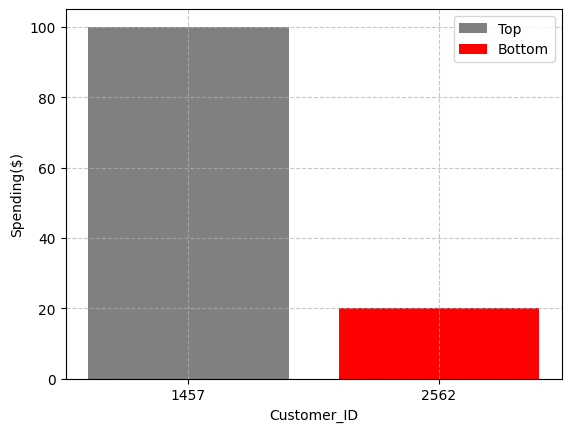

In [4]:
fig,ax=plt.subplots()
ax.set_ylabel("Spending($)")
ax.set_xlabel("Customer_ID")
plt.bar(top_and_bottom_customers["Customer_ID"],
        top_and_bottom_customers["Spending"],
        color=["grey","red"],label=["Top","Bottom"])
ax.legend(loc="upper right")
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart1.png")
plt.show()

Top selling Categories

In [22]:
query2="""
SELECT Category, SUM(Purchase_Amount_USD) AS Revenue
FROM [dbo].[shopping_trends_updated]
GROUP BY Category;
"""
category_sales=pd.read_sql(query2,engine)
category_sales

,Category,Revenue
0,Clothing,104264
1,Accessories,74200
2,Outerwear,18524
3,Footwear,36093


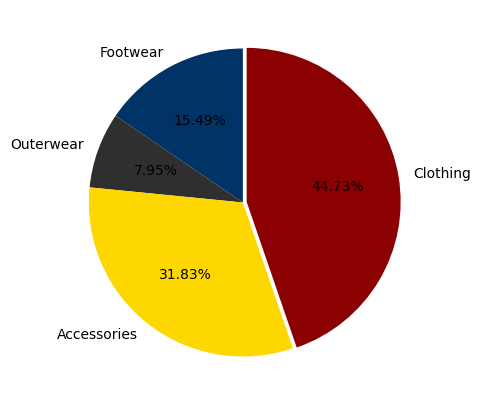

In [23]:
colors = ['#8B0000', '#FFD700', '#2F2F2F', '#003366']
fig,ax= plt.subplots(figsize=(5,5))
ax.pie(
    x=category_sales["Revenue"][::-1],
    labels=category_sales["Category"][::-1],
    startangle=90,
    autopct="%.2f%%",
    colors=colors[::-1],
    explode=(0,0,0,0.025)
)
plt.savefig("Downloads/chart2.png")
plt.show()    

3)Revenue and Average Purchase Amount by Gender

In [7]:
query3="""SELECT Gender, COUNT(Item_Purchased) AS Sales,
       SUM(Purchase_Amount_USD) AS Revenue 
       FROM [dbo].[shopping_trends_updated]
       GROUP BY Gender"""
gender_revenue=pd.read_sql(query3, engine)
gender_revenue

,Gender,Sales,Revenue
0,Male,2652,157890
1,Female,1248,75191


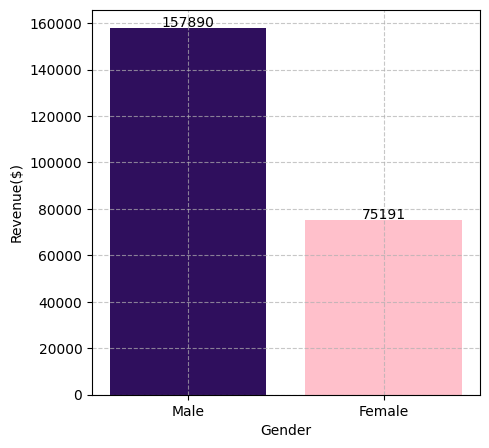

In [8]:
colors2=["#2F0F5D","pink"]
fig , ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("Gender")
ax.set_ylabel("Revenue($)")
bars=ax.bar(gender_revenue["Gender"],
            gender_revenue["Revenue"],
            color=colors2)
ax.bar_label(bars, padding=-1)
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart3.png")
plt.show()

3.1) Average Purchase Amount by Gender

In [9]:
query4="""with ct as (SELECT Gender, COUNT(Item_Purchased) AS Sales, 
         SUM(Purchase_Amount_USD) AS Revenue 
         FROM [dbo].[shopping_trends_updated]
         GROUP BY Gender)
         SELECT gender AS Gender, (Revenue/Sales) as Average from ct"""
avg_spending=pd.read_sql(query4,engine)
avg_spending

,Gender,Average
0,Male,59
1,Female,60


4)Impact of Discounts & Promo Codes

In [10]:
query5="""
        SELECT Discount_Applied , 
        Promo_Code_Used, 
        SUM(Purchase_Amount_USD) AS Spending
        FROM [dbo].[shopping_trends_updated]
        GROUP BY  Discount_Applied , Promo_Code_Used;"""

promo_discount=pd.read_sql(query5,engine)
promo_discount

,Discount_Applied,Promo_Code_Used,Spending
0,Yes,Yes,99411
1,No,No,133670


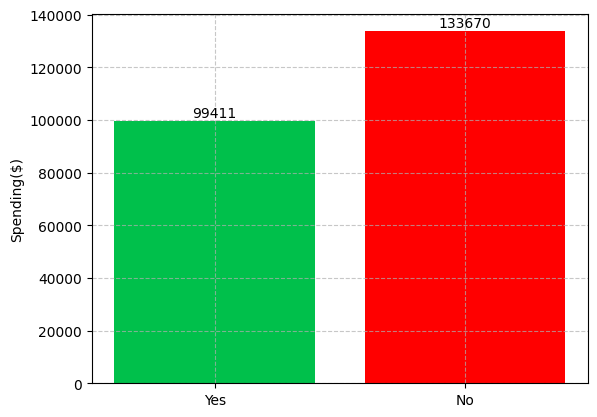

In [11]:
fig,ax=plt.subplots()
ax.set_ylabel("Spending($)")
bars=plt.bar(promo_discount["Promo_Code_Used"],
             promo_discount["Spending"],
             color=["#00c04b","red"])
ax.bar_label(bars,padding=1)
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart4.png")
plt.show()

5)Seasonal Purchase Trends

In [12]:
query6="""
       SELECT  Season, COUNT(Item_Purchased) AS Purchases
       From shopping_trends_updated 
       GROUP BY Season;
       """
seasonal_purchases=pd.read_sql(query6,engine)
seasonal_purchases

,Season,Purchases
0,Summer,955
1,Fall,975
2,Spring,999
3,Winter,971


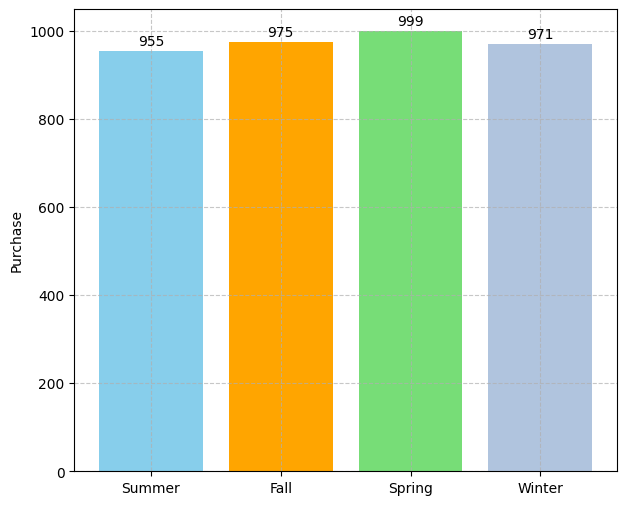

In [13]:
fig,ax= plt.subplots(figsize=(7,6))
ax.set_ylabel("Purchase")
bars =plt.bar( seasonal_purchases["Season"],seasonal_purchases["Purchases"], 
              color = ["#87CEEB","#FFA500", "#77DD77", "#B0C4DE"])
ax.bar_label(bars, padding=2)
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart5.png")
plt.show()

Subscription Status vs Spending

In [14]:
Query7="""
        SELECT Subscription_Status,
        SUM(Purchase_Amount_USD) AS Spending
        FROM [dbo].[shopping_trends_updated]
        GROUP BY Subscription_Status;"""

subscription_df=pd.read_sql(Query7,engine)
subscription_df

,Subscription_Status,Spending
0,Yes,62645
1,No,170436


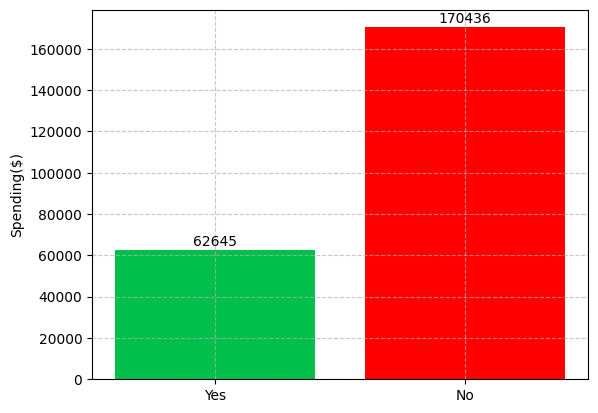

In [15]:
fig,ax=plt.subplots()
ax.set_ylabel("Spending($)")
bars=plt.bar(subscription_df["Subscription_Status"],
             subscription_df["Spending"],color=["#00c04b","red"])
ax.bar_label(bars,padding=1)
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart6.png")
plt.show()

Location-Based Insights

In [16]:
query8="""
       SELECT * FROM (select top(1) Location, 
       SUM(Purchase_Amount_USD) AS [Revenue]
       FROM shopping_trends_updated 
       GROUP BY Location 
       ORDER BY [Revenue] desc) AS table1
       UNION ALL
       SELECT * FROM (SELECT TOP(1) Location, 
       SUM(Purchase_Amount_USD) AS [Revenue] 
       FROM shopping_trends_updated 
       GROUP BY Location 
       ORDER BY [Revenue] asc) AS table2
       """
top_bottom_city=pd.read_sql(query8, engine)
top_bottom_city

,Location,Revenue
0,Montana,5784
1,Kansas,3437


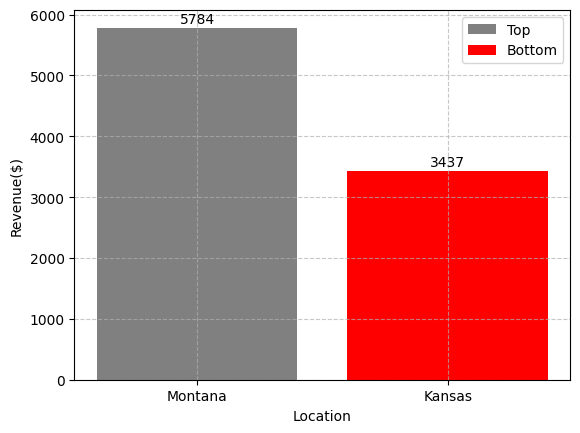

In [17]:
fig,ax=plt.subplots()
ax.set_ylabel("Revenue($)")
ax.set_xlabel("Location")
bars=plt.bar(top_bottom_city["Location"],top_bottom_city["Revenue"],
             color=["grey","red"],label=["Top","Bottom"])
ax.bar_label(bars,padding=1)
ax.legend(loc="upper right")
plt.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart7.png")
plt.show()

Effect of Shipping Type on Purchase Amount

In [18]:
query9="""
       SELECT Frequency_of_Purchases,
       SUM(Purchase_Amount_USD) AS Total_Spend
       FROM [dbo].[shopping_trends_updated]
       GROUP BY Frequency_of_Purchases
       ORDER BY Total_Spend DESC;"""

purchase_frequency=pd.read_sql(query9,engine)
purchase_frequency

,Frequency_of_Purchases,Total_Spend
0,Every 3 Months,35088
1,Annually,34419
2,Quarterly,33771
3,Bi-Weekly,33200
4,Monthly,32810
5,Fortnightly,32007
6,Weekly,31786


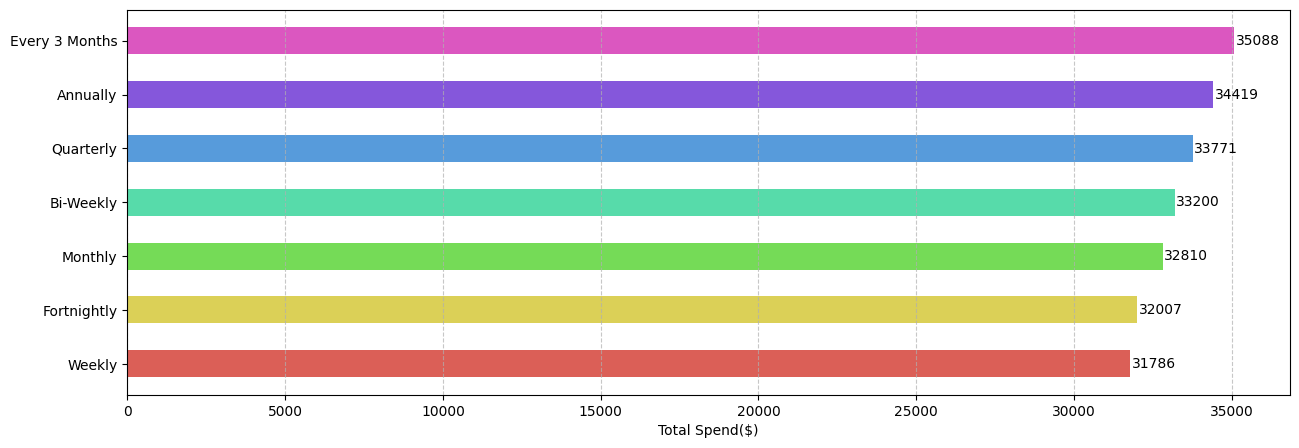

In [19]:
colors = sns.color_palette("hls",7) 
fig,ax=plt.subplots(figsize=(15,5))
ax.set_xlabel("Total Spend($)")
bars=plt.barh(purchase_frequency["Frequency_of_Purchases"][::-1],
              purchase_frequency["Total_Spend"][::-1],color=colors,height=0.5)
ax.bar_label(bars,padding=1,rotation=360)
ax.grid(axis="x",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart8.png")
plt.show()

In [20]:
query10="""
       SELECT Shipping_Type,
       SUM(Purchase_Amount_USD) AS Purchase_Amount
       FROM [dbo].[shopping_trends_updated]
       GROUP BY Shipping_Type;"""

shipping=pd.read_sql(query10,engine)
shipping

,Shipping_Type,Purchase_Amount
0,Next Day Air,37993
1,Store Pickup,38931
2,Free Shipping,40777
3,Express,39067
4,Standard,38233
5,2-Day Shipping,38080


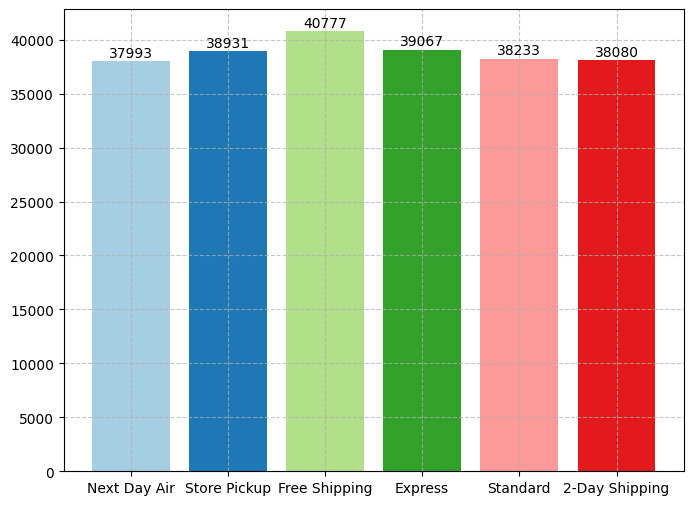

In [21]:
colors = sns.color_palette("Paired",7) 
fig,ax=s=plt.subplots(figsize=(8,6))
bars=plt.bar(shipping["Shipping_Type"],
             shipping["Purchase_Amount"],color=colors)
ax.bar_label(bars,padding=1)
ax.grid(axis="both",linestyle="--",alpha=0.7)
plt.savefig("Downloads/chart9.png")
plt.show()